[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lucasmiranda42/deepof/blob/master/docs/source/tutorial_notebooks/deepof_unsupervised_tutorial.ipynb)

#### Deepof is a tool for mouse behavioral analysis based on tracked data from Deep Lab Cut (DLC) or Social Leap (SLEAP).<br> To start a new Deepof project, all that we need is a folder structure like this:

![folders](./tutorial_files/Assets/Get_started.png)

#### This structure contains:

* Your Tables generated by DLC or SLEAP
* The corresponding videos
* A small .csv file containing the names of your experiment conditions

In [1]:
#!pip install deepof

module("unload","cuda/12.2")
module("unload","cudnn/8.9.2")
module("unload","ffmpeg/4.4")
module("load",  "cuda/12.2")
module("load",  "cudnn/8.9.2")
module("load",  "ffmpeg/4.4")

#### Lets's start a new Deepof project

In [4]:
# Some imports

import copy
import os
import numpy as np
import pandas as pd
import pickle
import deepof.data
from IPython import display
from networkx import Graph, draw
import deepof.visuals
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Entering basic project information

my_deepof_project_raw = deepof.data.Project(
    project_path = os.path.join("tutorial_files"),           # The paths to your folders
    video_path   = os.path.join("tutorial_files/Videos/"),
    table_path   = os.path.join("tutorial_files/Tables/"),
    project_name = "deepof_tutorial_project",                # The name of your project
    arena        = "circular-autodetect",                    # Automatic detection of circular arena borders
    animal_ids   = ["B", "W"],                               # Animal ids from your tables
    table_format = "h5",                                     # Table and video formats
    video_format = ".mp4",
)

In [6]:
# Creating the project

my_deepof_project = my_deepof_project_raw.create(force=True)

Setting up project directories...
Loading trajectories...
Smoothing trajectories...
Removing outliers...
Iterative imputation of ocluded bodyparts...
Detecting arena...
Computing distances...
Computing angles...
Computing areas...
Done!


#### Let's have a short look at one of our table files that is now within the project.

In [7]:
my_deepof_project.get_coords(polar=False, center="Center", align="Spine_1")[
    "20191204_Day2_SI_JB08_Test_54"
]

B_Spine_1            B_Center      B_Left_bhip             \
                           x          y        x    y           x          y   
00:00:00                 0.0  16.446049      0.0  0.0   11.477392 -12.396184   
00:00:00.040002666       0.0  16.446049      0.0  0.0   11.477392 -12.396184   
00:00:00.080005333       0.0  16.446049      0.0  0.0   11.477392 -12.396184   
00:00:00.120008          0.0  15.217471      0.0  0.0   10.208929 -14.160422   
00:00:00.160010667       0.0  15.037661      0.0  0.0   10.836278 -15.220016   
...                      ...        ...      ...  ...         ...        ...   
00:09:59.799986665       0.0  17.383248      0.0  0.0   15.964067 -11.925361   
00:09:59.839989332       0.0  15.069466      0.0  0.0   15.782191 -13.477307   
00:09:59.879991999       0.0  19.435452      0.0  0.0   12.847699 -11.565337   
00:09:59.919994666       0.0  19.435452      0.0  0.0   12.847699 -11.565337   
00:09:59.959997333       0.0  19.435452      0.0  0.0   12.847699 -11.565337   

                   B_Left_ear            B_Left_fhip             ...  \
                            x          y           x          y  ...   
00:00:00             0.097058  35.005123   13.716177  13.898245  ...   
00:00:00.040002666   0.097058  35.005123   13.716177  13.898245  ...   
00:00:00.080005333   0.097058  35.005123   13.716177  13.898245  ...   
00:00:00.120008     -0.358944  35.315238   15.230371  11.435026  ...   
00:00:00.160010667   0.861588  34.324996   14.984769  10.471671  ...   
...                       ...        ...         ...        ...  ...   
00:09:59.799986665  10.656659  35.405095   14.810418  11.274646  ...   
00:09:59.839989332   7.241665  39.238713   14.817891   9.091579  ...   
00:09:59.879991999   7.622537  42.242580   14.851513  12.187553  ...   
00:09:59.919994666   7.622537  42.242580   14.851513  12.187553  ...   
00:09:59.959997333   7.622537  42.242580   14.851513  12.187553  ...   

                   W_Spine_2              W_Tail_1              W_Tail_2  \
                           x          y          x          y          x   
00:00:00            0.793344 -21.164102   0.196324 -82.715945 -33.599100   
00:00:00.040002666  0.793344 -21.164102   0.196324 -82.715945 -33.599100   
00:00:00.080005333  0.793344 -21.164102   0.196324 -82.715945  -8.483314   
00:00:00.120008     1.309583 -22.165510   3.159916 -82.164926  -5.778748   
00:00:00.160010667  1.955115 -22.447854   4.138384 -87.393984   1.502869   
...                      ...        ...        ...        ...        ...   
00:09:59.799986665 -6.286187 -15.291244 -40.771319 -41.388345        NaN   
00:09:59.839989332 -6.220324 -15.480332 -40.600955 -41.616451        NaN   
00:09:59.879991999 -6.179682 -15.503151 -40.460029 -41.736020        NaN   
00:09:59.919994666 -6.179682 -15.503151 -40.460029 -41.736020        NaN   
00:09:59.959997333 -6.179682 -15.503151 -40.460029 -41.736020        NaN   

                               W_Tail_base            W_Tail_tip              
                             y           x          y          x           y  
00:00:00           -134.330612    1.765988 -41.624562 -36.979202 -139.292430  
00:00:00.040002666 -134.330612    1.765988 -41.624562 -36.979202 -139.292430  
00:00:00.080005333 -113.444522    1.765988 -41.624562 -36.979202 -139.292430  
00:00:00.120008    -112.144825    2.815459 -42.444154 -28.455627 -137.997761  
00:00:00.160010667 -117.406373    2.289358 -44.418899  -7.287136 -139.586363  
...                        ...         ...        ...        ...         ...  
00:09:59.799986665         NaN  -18.448989 -26.719926        NaN         NaN  
00:09:59.839989332         NaN  -18.379191 -26.895317        NaN         NaN  
00:09:59.879991999         NaN  -18.331690 -26.956528        NaN         NaN  
00:09:59.919994666         NaN  -18.331690 -26.956528        NaN         NaN  
00:09:59.959997333         NaN  -18.331690 -26.956528        NaN         NaN  

[14999 rows x 56 columns

#### Now let's add the experiment conditions (the .csv file from before). We also can do this during project creation.

In [8]:
#This is how the .csv looks

pd.read_csv("./tutorial_files/tutorial_exp_conditions.csv", index_col=0)

experiment_id         CSDS
0  20191204_Day2_SI_JB08_Test_54  Nonstressed
1  20191204_Day2_SI_JB08_Test_56     Stressed
2  20191204_Day2_SI_JB08_Test_61     Stressed
3  20191204_Day2_SI_JB08_Test_62     Stressed
4  20191204_Day2_SI_JB08_Test_63  Nonstressed
5  20191204_Day2_SI_JB08_Test_64  Nonstressed

In [9]:
# Load the exp conditions into teh project

my_deepof_project.load_exp_conditions("./tutorial_files/tutorial_exp_conditions.csv")

#### Let's visualize our mice

In [10]:
from IPython import display

video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    experiment_id = "20191204_Day2_SI_JB08_Test_54",
    frame_limit   = 300,
    dpi           = 60,
)

html = display.HTML(video)
display.display(html)
plt.close()

#### Where were the mice located, on average?

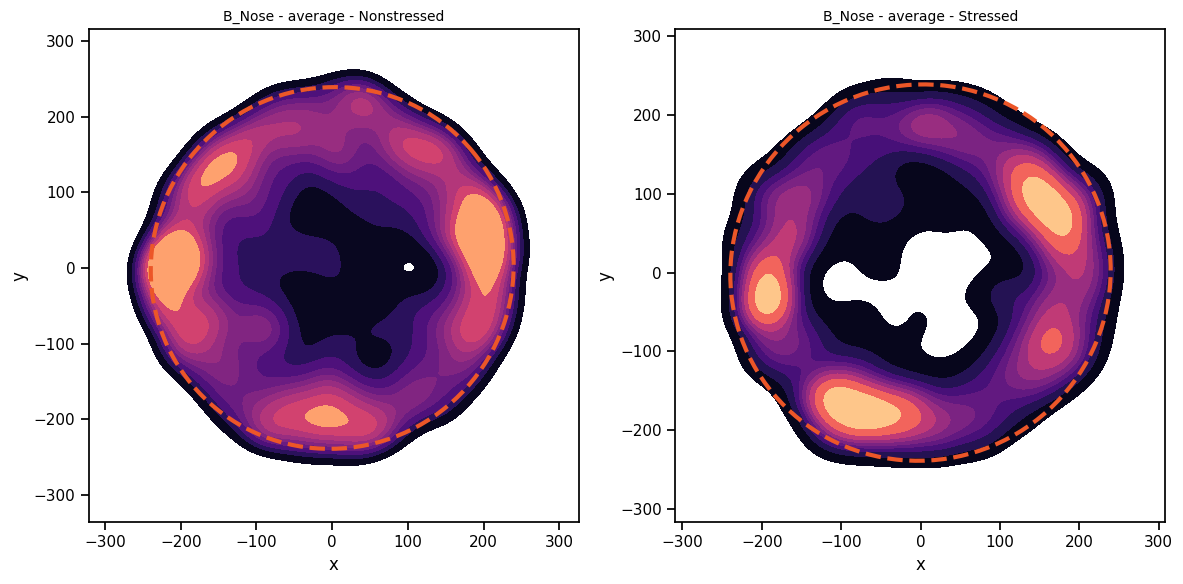

In [12]:
sns.set_context("notebook")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

deepof.visuals.plot_heatmaps(
    my_deepof_project,
    ["B_Nose"],                        # In this case, we track the location of the Nose of the mice
    center          = "arena",
    exp_condition   = "CSDS",
    condition_value = "Nonstressed",
    ax              = ax1,
    show            = False,
    display_arena   = True,
    experiment_id   = "average",
)

deepof.visuals.plot_heatmaps(
    my_deepof_project,
    ["B_Nose"],
    center          = "arena",
    exp_condition   = "CSDS",
    condition_value = "Stressed",
    ax              = ax2,
    show            = False,
    display_arena   = True,
    experiment_id   = "average",
)

plt.tight_layout()
plt.show()

#### Of course we cannot derive a lot of useful information from only six videos. Let's load a bigger project

In [11]:
# Load results
with open(
    "./tutorial_files/tutorial_project/Coordinates/deepof_coordinates.pkl", "rb"
) as handle:
    my_deepof_project = pickle.load(handle)

#### We might be interested in compairing specific pre-defined behavior patterns between the two groups of mice.<br> For this, we can use the supervised annotations:

In [12]:
supervised_annotation = my_deepof_project.supervised_annotation()

100%|██████████| 53/53 [00:11<00:00,  4.74it/s]


#### First, let's look at the distribution of detected behaviors over time for one mouse using a Gantt plot

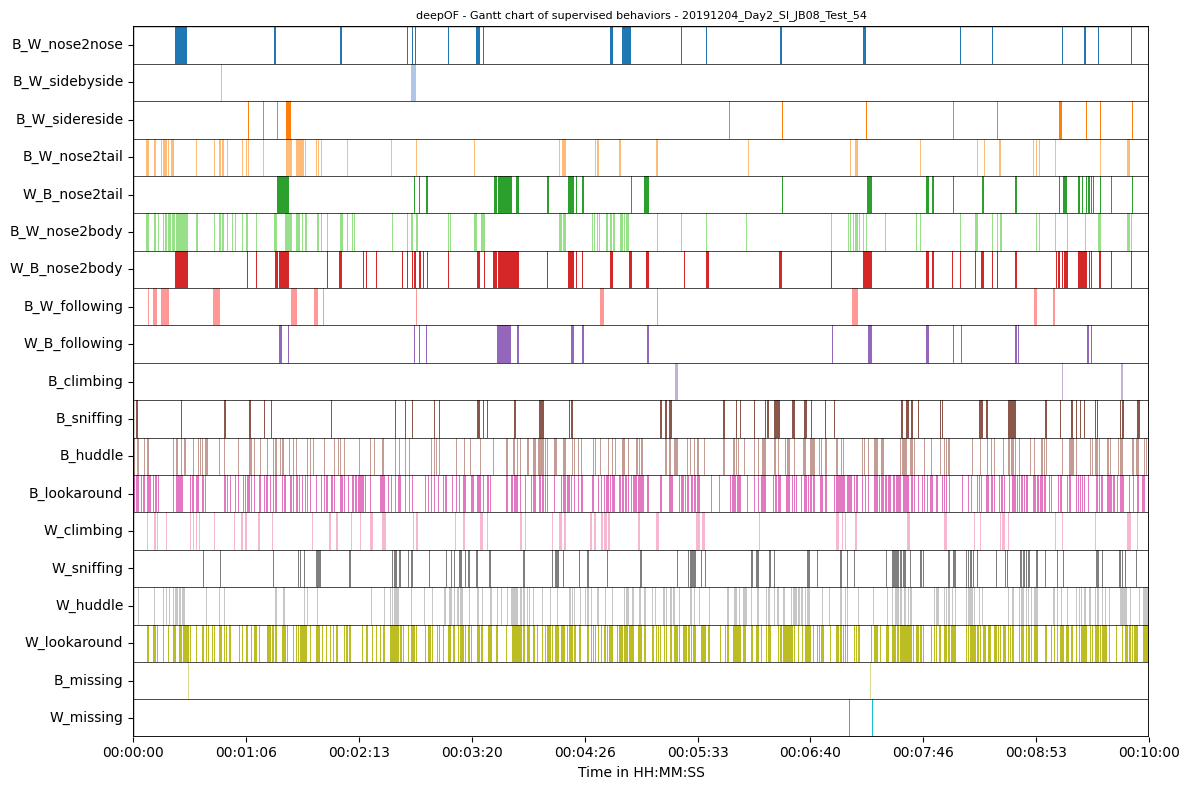

In [13]:
plt.figure(figsize=(12, 8))

deepof.visuals.plot_gantt(
    my_deepof_project,
    "20191204_Day2_SI_JB08_Test_54",
    supervised_annotations=supervised_annotation,
)

plt.show()

#### Now, let's compare the frequency of the different behaviors between groups (Stressed and Nonstressed)

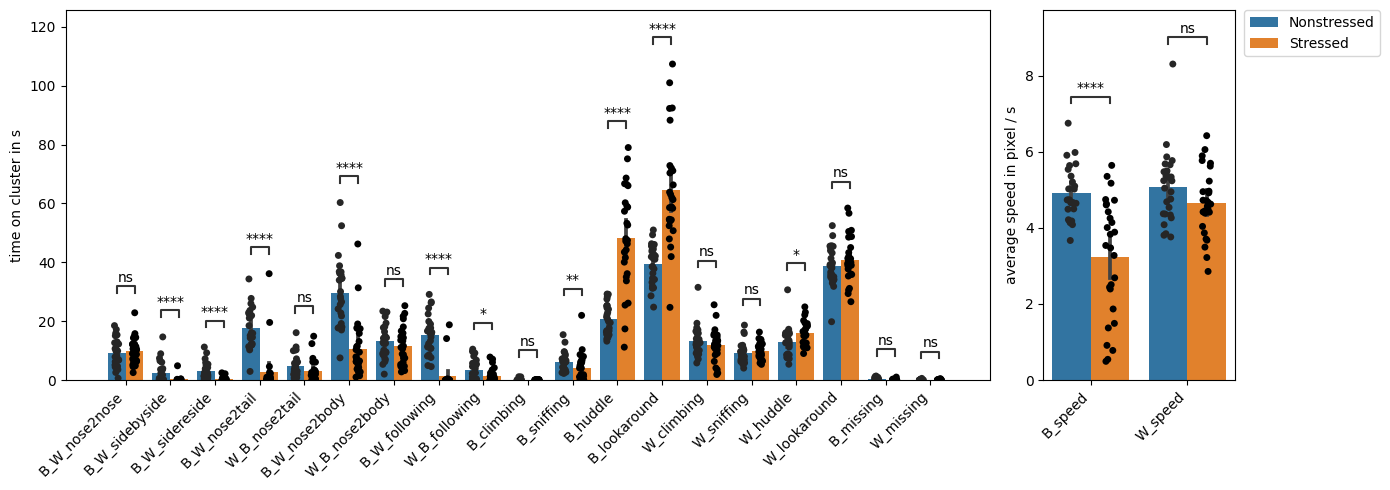

In [14]:
fig = plt.figure(figsize=(14, 5)).subplot_mosaic(
    mosaic="""
           AAAAB
           AAAAB
           """,
)

deepof.visuals.plot_enrichment(
    my_deepof_project,
    supervised_annotations = supervised_annotation,
    add_stats              = "Mann-Whitney",
    plot_speed             = False,
    bin_index              = 0,
    bin_size               = 120,
    ax                     = fig["A"],
)

deepof.visuals.plot_enrichment(
    my_deepof_project,
    supervised_annotations = supervised_annotation,
    add_stats              = "Mann-Whitney",
    plot_speed             = True,
    bin_index              = 0,
    bin_size               = 120,
    ax                     = fig["B"],
)

for ax in fig:
    fig[ax].set_xticklabels(fig[ax].get_xticklabels(), rotation=45, ha="right")
    fig[ax].set_title("")
    fig[ax].set_xlabel("")

fig["A"].get_legend().remove()

plt.tight_layout()
plt.show()

#### Let's switch to a polar plot to get a better overview

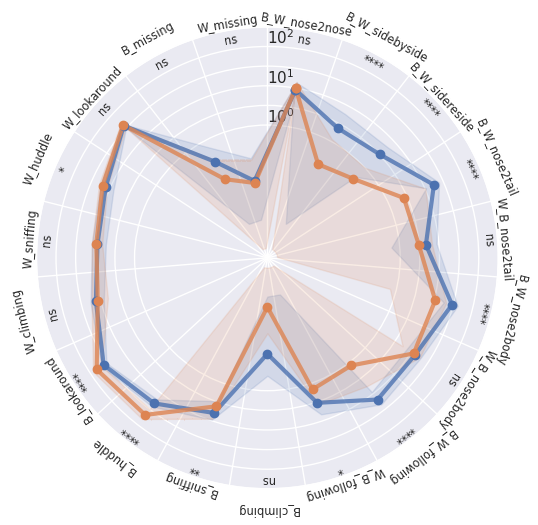

In [35]:
deepof.visuals.plot_enrichment(
    my_deepof_project,
    supervised_annotations = supervised_annotation,
    add_stats              = "Mann-Whitney",
    plot_speed             = False,
    bin_index              = 0,
    bin_size               = 120,
    polar_depiction        = True

)

#plt.tight_layout()
plt.show()

#### Among others, the B_W_nose2tail behavior showed a distinct difference (i.e. the black mouse sniffing on the behind of the white mouse). Let's have a look how this specific behavior changes over time between the two groups

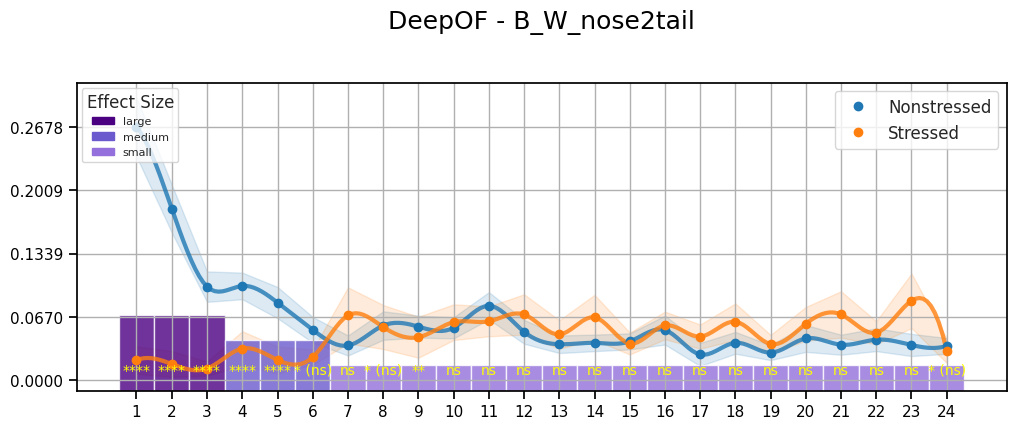

In [16]:
sns.set_context("notebook")

deepof.visuals.plot_behavior_trends(
    my_deepof_project,
    supervised_annotations = supervised_annotation,
    behavior_to_plot       = 'B_W_nose2tail',
    polar_depiction        = False,
    normalize              = True,
)


#### We notice that the change in behavior is only prevalent during the beginning of the recordings. When subjected to chronic social defeat stress, the black mouse does not dare to approach the bigger white mouse to "sniff it out". 

#### But how well can the different groups be separated in general? We can visualize this with a PCA of all behaviors:

Info! Set aggregate_experiments to -mean- since supervised annotations were given!


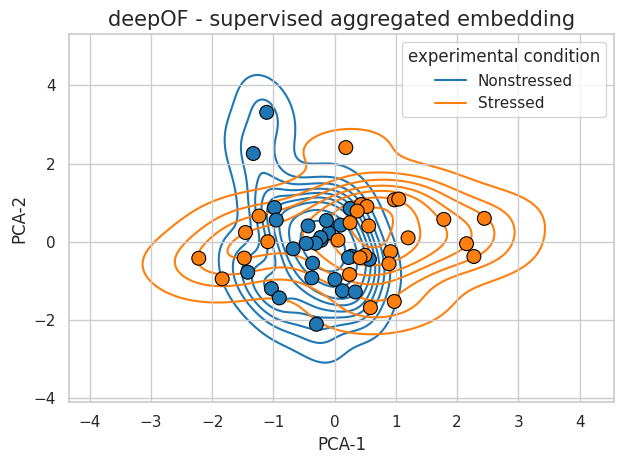

In [17]:
deepof.visuals.plot_embeddings(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
)

#### All this looks pretty nice. But what if you just want to compare your groups "in general" without predefined behaviors? Well, you can use the unsupervised pipeline and train your own model:

#### Training a model on a larger dataset takes some time. hence, for demonstration purposes, let's load a smaller project again

In [18]:
small_deepof_project = deepof.data.load_project("./tutorial_files/sample_project")

#### First we need to preprocess our data for model training. Thsi is one way we can do that:

In [19]:
# This code will generate a dataset using graph representations, as well a some auxiliary objects
(
    graph_preprocessed_coords,
    adj_matrix,
    to_preprocess,
    global_scaler,
) = small_deepof_project.get_graph_dataset(
    animal_id    = "B",  # Comment out for multi-animal embeddings
    center       = "Center",
    align        = "Spine_1",
    window_size  = 25,
    window_step  = 1,
    test_videos  = 1,
    preprocess   = True,
    scale        = "standard",
)

#### Among others, we just generated a graphical representation of the mouse body part connections

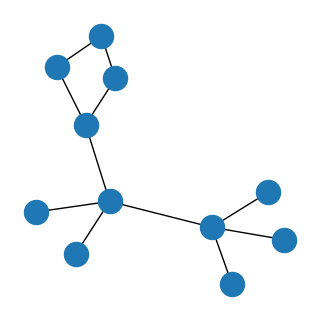

In [20]:
plt.figure(figsize=(3, 3))
draw(Graph(adj_matrix))
plt.show()

#### Now we train a model

In [33]:
trained_model = small_deepof_project.deep_unsupervised_embedding(
    preprocessed_object = graph_preprocessed_coords,  # Change to preprocessed_coords to use non-graph embeddings
    adjacency_matrix    = adj_matrix,
    embedding_model     = "VaDE",       # Can also be set to 'VQVAE' and 'Contrastive'
    epochs              = 10,
    encoder_type        = "recurrent",  # Can also be set to 'TCN' and 'transformer'
    n_components        = 10,
    latent_dim          = 6,
    batch_size          = 1024,
    verbose             = True,         # Set to True to follow the training loop
    interaction_regularization = 0.0,
    pretrained          = False,        # Set to False to train a new model!
)

2024-09-20 15:17:04.398660: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-09-20 15:17:04.398746: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-09-20 15:17:04.398857: E tensorflow/compiler/xla/backends/profiler/gpu/cupti_error_manager.cc:135] cuptiGetTimestamp: ignored due to a previous error.
2024-09-20 15:17:04.398879: E tensorflow/compiler/xla/backends/profiler/gpu/cupti_error_manager.cc:186] cuptiSubscribe: ignored due to a previous error.
2024-09-20 15:17:04.398889: E tensorflow/compiler/xla/backends/profiler/gpu/cupti_error_manager.cc:459] cuptiGetResultString: ignored due to a previous error.
2024-09-20 15:17:04.398903: E tensorflow/compiler/xla/backends/profiler/gpu/cupti_tracer.cc:1746] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 
2024-09-20 15:17:04.399210: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session te

Epoch 1/10
73/73 [==============================] - 55s 296ms/step - total_loss: 46.9627 - reconstruction_loss: 45.1185 - clustering_loss: 0.0000e+00 - prior_loss: 0.0000e+00 - kl_weight: 0.0167 - kl_divergence: -4.7201 - kmeans_loss: 1.8653 - number_of_populated_clusters: 10.0000 - confidence_in_selected_cluster: 0.5936
Epoch 2/10


2024-09-20 15:18:22.617550: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


73/73 [==============================] - 22s 295ms/step - total_loss: 42.7088 - reconstruction_loss: 41.5714 - clustering_loss: 0.0000e+00 - prior_loss: 0.0000e+00 - kl_weight: 0.0500 - kl_divergence: -3.6975 - kmeans_loss: 1.6699 - number_of_populated_clusters: 10.0000 - confidence_in_selected_cluster: 0.5786
Epoch 3/10
73/73 [==============================] - 22s 296ms/step - total_loss: 42.1146 - reconstruction_loss: 41.2321 - clustering_loss: 0.0000e+00 - prior_loss: 0.0000e+00 - kl_weight: 0.0833 - kl_divergence: -3.4339 - kmeans_loss: 1.5546 - number_of_populated_clusters: 10.0000 - confidence_in_selected_cluster: 0.5503
Epoch 4/10


2024-09-20 15:19:06.842502: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


73/73 [==============================] - 22s 294ms/step - total_loss: 41.5961 - reconstruction_loss: 40.8716 - clustering_loss: 0.0000e+00 - prior_loss: 0.0000e+00 - kl_weight: 0.1167 - kl_divergence: -3.3157 - kmeans_loss: 1.5089 - number_of_populated_clusters: 10.0000 - confidence_in_selected_cluster: 0.5380
Epoch 5/10
73/73 [==============================] - 22s 296ms/step - total_loss: 41.1296 - reconstruction_loss: 40.5799 - clustering_loss: 0.0000e+00 - prior_loss: 0.0000e+00 - kl_weight: 0.1500 - kl_divergence: -3.2496 - kmeans_loss: 1.4939 - number_of_populated_clusters: 10.0000 - confidence_in_selected_cluster: 0.5325
Epoch 6/10


2024-09-20 15:19:50.849761: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


73/73 [==============================] - 22s 294ms/step - total_loss: 40.7455 - reconstruction_loss: 40.3720 - clustering_loss: 0.0000e+00 - prior_loss: 0.0000e+00 - kl_weight: 0.1833 - kl_divergence: -3.2084 - kmeans_loss: 1.4882 - number_of_populated_clusters: 10.0000 - confidence_in_selected_cluster: 0.5296
Epoch 7/10
73/73 [==============================] - 22s 296ms/step - total_loss: 40.3930 - reconstruction_loss: 40.2134 - clustering_loss: 0.0000e+00 - prior_loss: 0.0000e+00 - kl_weight: 0.2167 - kl_divergence: -3.1813 - kmeans_loss: 1.4875 - number_of_populated_clusters: 10.0000 - confidence_in_selected_cluster: 0.5285
Epoch 8/10


2024-09-20 15:20:35.047791: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


73/73 [==============================] - 22s 297ms/step - total_loss: 40.0979 - reconstruction_loss: 40.1138 - clustering_loss: 0.0000e+00 - prior_loss: 0.0000e+00 - kl_weight: 0.2500 - kl_divergence: -3.1625 - kmeans_loss: 1.4877 - number_of_populated_clusters: 10.0000 - confidence_in_selected_cluster: 0.5277
Epoch 9/10
73/73 [==============================] - 22s 296ms/step - total_loss: 39.8048 - reconstruction_loss: 40.0263 - clustering_loss: 0.0000e+00 - prior_loss: 0.0000e+00 - kl_weight: 0.2833 - kl_divergence: -3.1507 - kmeans_loss: 1.4893 - number_of_populated_clusters: 10.0000 - confidence_in_selected_cluster: 0.5271
Epoch 10/10


2024-09-20 15:21:19.314150: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


73/73 [==============================] - 22s 295ms/step - total_loss: 39.4475 - reconstruction_loss: 39.9604 - clustering_loss: 0.0000e+00 - prior_loss: 0.0000e+00 - kl_weight: 0.3167 - kl_divergence: -3.1614 - kmeans_loss: 1.4965 - number_of_populated_clusters: 10.0000 - confidence_in_selected_cluster: 0.5279
Initialization 0
  Iteration 10
Initialization converged: True
Epoch 1/10
 1/73 [..............................] - ETA: 1:30 - total_loss: 41.9396 - reconstruction_loss: 38.6561 - clustering_loss: -0.0054 - prior_loss: 0.0335 - kl_weight: 0.3329 - kl_divergence: -3.2206 - kmeans_loss: 1.5072 - number_of_populated_clusters: 9.9973 - confidence_in_selected_cluster: 0.5288

2024-09-20 15:21:45.527785: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-09-20 15:21:45.527819: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-09-20 15:21:45.527839: E tensorflow/compiler/xla/backends/profiler/gpu/cupti_error_manager.cc:135] cuptiGetTimestamp: ignored due to a previous error.
2024-09-20 15:21:45.527847: E tensorflow/compiler/xla/backends/profiler/gpu/cupti_error_manager.cc:186] cuptiSubscribe: ignored due to a previous error.
2024-09-20 15:21:45.527853: E tensorflow/compiler/xla/backends/profiler/gpu/cupti_error_manager.cc:459] cuptiGetResultString: ignored due to a previous error.
2024-09-20 15:21:45.527858: E tensorflow/compiler/xla/backends/profiler/gpu/cupti_tracer.cc:1746] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 
2024-09-20 15:21:45.847403: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session col

 2/73 [..............................] - ETA: 1:10 - total_loss: 41.0811 - reconstruction_loss: 37.7201 - clustering_loss: -0.0060 - prior_loss: 0.0350 - kl_weight: 0.3327 - kl_divergence: -3.2214 - kmeans_loss: 1.5075 - number_of_populated_clusters: 9.9973 - confidence_in_selected_cluster: 0.5291

2024-09-20 15:21:46.426651: I tensorflow/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: /raven/ptmp/bep/deepof-demo/tutorial_files/sample_project/Trained_models/fit/deepof_unsupervised_VaDE_recurrent_encodings_input_type=coords_kmeans_loss=0.0_encoding=6_k=10_20240920-151704/plugins/profile/2024_09_20_15_21_46/robg08.xplane.pb


73/73 [==============================] - ETA: 0s - total_loss: 42.8215 - reconstruction_loss: 39.8270 - clustering_loss: -0.0479 - prior_loss: 0.1370 - kl_weight: 0.3185 - kl_divergence: -3.2418 - kmeans_loss: 1.5155 - number_of_populated_clusters: 9.9903 - confidence_in_selected_cluster: 0.5483

2024-09-20 15:22:07.496212: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


73/73 [==============================] - 34s 461ms/step - total_loss: 42.8215 - reconstruction_loss: 39.8270 - clustering_loss: -0.0485 - prior_loss: 0.1384 - kl_weight: 0.3184 - kl_divergence: -3.2419 - kmeans_loss: 1.5155 - number_of_populated_clusters: 9.9902 - confidence_in_selected_cluster: 0.5486 - val_total_loss: 42.7637 - val_reconstruction_loss: 40.6893 - val_clustering_loss: -0.1022 - val_prior_loss: 0.2695 - val_kl_weight: 0.3020 - val_kl_divergence: -3.2475 - val_kmeans_loss: 1.5096 - val_number_of_populated_clusters: 9.9853 - val_confidence_in_selected_cluster: 0.5732 - lr: 0.0010
Epoch 2/10
73/73 [==============================] - ETA: 0s - total_loss: 42.3906 - reconstruction_loss: 39.7745 - clustering_loss: -0.1375 - prior_loss: 0.3554 - kl_weight: 0.2928 - kl_divergence: -3.2448 - kmeans_loss: 1.5118 - number_of_populated_clusters: 9.9822 - confidence_in_selected_cluster: 0.5894

2024-09-20 15:22:41.104473: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


73/73 [==============================] - 25s 336ms/step - total_loss: 42.3906 - reconstruction_loss: 39.7745 - clustering_loss: -0.1379 - prior_loss: 0.3565 - kl_weight: 0.2927 - kl_divergence: -3.2447 - kmeans_loss: 1.5118 - number_of_populated_clusters: 9.9822 - confidence_in_selected_cluster: 0.5896 - val_total_loss: 42.4580 - val_reconstruction_loss: 40.6096 - val_clustering_loss: -0.1817 - val_prior_loss: 0.4631 - val_kl_weight: 0.2830 - val_kl_divergence: -3.2397 - val_kmeans_loss: 1.5035 - val_number_of_populated_clusters: 9.9779 - val_confidence_in_selected_cluster: 0.6096 - lr: 0.0010
Epoch 3/10
73/73 [==============================] - 25s 334ms/step - total_loss: 42.1241 - reconstruction_loss: 39.7249 - clustering_loss: -0.2112 - prior_loss: 0.5347 - kl_weight: 0.2780 - kl_divergence: -3.2354 - kmeans_loss: 1.5056 - number_of_populated_clusters: 9.9712 - confidence_in_selected_cluster: 0.6232 - val_total_loss: 42.2303 - val_reconstruction_loss: 40.5282 - val_clustering_loss: 

2024-09-20 15:23:30.886955: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


73/73 [==============================] - 25s 334ms/step - total_loss: 41.8430 - reconstruction_loss: 39.6375 - clustering_loss: -0.2723 - prior_loss: 0.6829 - kl_weight: 0.2714 - kl_divergence: -3.2257 - kmeans_loss: 1.5017 - number_of_populated_clusters: 9.9564 - confidence_in_selected_cluster: 0.6513 - val_total_loss: 41.8509 - val_reconstruction_loss: 40.3622 - val_clustering_loss: -0.3030 - val_prior_loss: 0.7573 - val_kl_weight: 0.2704 - val_kl_divergence: -3.2206 - val_kmeans_loss: 1.4967 - val_number_of_populated_clusters: 9.9490 - val_confidence_in_selected_cluster: 0.6654 - lr: 0.0010
Epoch 5/10
73/73 [==============================] - 25s 331ms/step - total_loss: 41.5623 - reconstruction_loss: 39.5504 - clustering_loss: -0.3242 - prior_loss: 0.8083 - kl_weight: 0.2710 - kl_divergence: -3.2166 - kmeans_loss: 1.4995 - number_of_populated_clusters: 9.9416 - confidence_in_selected_cluster: 0.6752 - val_total_loss: 41.5334 - val_reconstruction_loss: 40.1822 - val_clustering_loss: 

2024-09-20 15:24:20.293712: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


73/73 [==============================] - 25s 333ms/step - total_loss: 41.2582 - reconstruction_loss: 39.4329 - clustering_loss: -0.3689 - prior_loss: 0.9156 - kl_weight: 0.2756 - kl_divergence: -3.2082 - kmeans_loss: 1.4997 - number_of_populated_clusters: 9.9255 - confidence_in_selected_cluster: 0.6959 - val_total_loss: 41.2083 - val_reconstruction_loss: 40.0490 - val_clustering_loss: -0.3917 - val_prior_loss: 0.9704 - val_kl_weight: 0.2799 - val_kl_divergence: -3.2039 - val_kmeans_loss: 1.4975 - val_number_of_populated_clusters: 9.9186 - val_confidence_in_selected_cluster: 0.7064 - lr: 0.0010
Epoch 7/10
73/73 [==============================] - 25s 334ms/step - total_loss: 40.9599 - reconstruction_loss: 39.3167 - clustering_loss: -0.4078 - prior_loss: 1.0085 - kl_weight: 0.2840 - kl_divergence: -3.2006 - kmeans_loss: 1.5011 - number_of_populated_clusters: 9.9116 - confidence_in_selected_cluster: 0.7139 - val_total_loss: 40.8697 - val_reconstruction_loss: 39.8795 - val_clustering_loss: 

2024-09-20 15:25:09.784106: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


73/73 [==============================] - 25s 333ms/step - total_loss: 40.6462 - reconstruction_loss: 39.1820 - clustering_loss: -0.4419 - prior_loss: 1.0898 - kl_weight: 0.2955 - kl_divergence: -3.1936 - kmeans_loss: 1.5045 - number_of_populated_clusters: 9.8922 - confidence_in_selected_cluster: 0.7297 - val_total_loss: 40.5492 - val_reconstruction_loss: 39.7239 - val_clustering_loss: -0.4595 - val_prior_loss: 1.1319 - val_kl_weight: 0.3032 - val_kl_divergence: -3.1901 - val_kmeans_loss: 1.5044 - val_number_of_populated_clusters: 9.8823 - val_confidence_in_selected_cluster: 0.7379 - lr: 0.0010
Epoch 9/10
73/73 [==============================] - 25s 333ms/step - total_loss: 40.3494 - reconstruction_loss: 39.0734 - clustering_loss: -0.4720 - prior_loss: 1.1614 - kl_weight: 0.3097 - kl_divergence: -3.1874 - kmeans_loss: 1.5086 - number_of_populated_clusters: 9.8697 - confidence_in_selected_cluster: 0.7437 - val_total_loss: 40.2333 - val_reconstruction_loss: 39.6494 - val_clustering_loss: 

2024-09-20 15:25:59.262107: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


73/73 [==============================] - 25s 333ms/step - total_loss: 40.0593 - reconstruction_loss: 38.9797 - clustering_loss: -0.4989 - prior_loss: 1.2251 - kl_weight: 0.3259 - kl_divergence: -3.1821 - kmeans_loss: 1.5128 - number_of_populated_clusters: 9.8493 - confidence_in_selected_cluster: 0.7562 - val_total_loss: 39.9085 - val_reconstruction_loss: 39.5040 - val_clustering_loss: -0.5129 - val_prior_loss: 1.2584 - val_kl_weight: 0.3360 - val_kl_divergence: -3.1795 - val_kmeans_loss: 1.5134 - val_number_of_populated_clusters: 9.8401 - val_confidence_in_selected_cluster: 0.7627 - lr: 0.0010


#### And extract some data using our trained model

In [34]:
# Get embeddings, soft_counts, and breaks per video
embeddings, soft_counts, breaks = deepof.model_utils.embedding_per_video(
    coordinates    = small_deepof_project,
    to_preprocess  = to_preprocess,
    model          = trained_model,
    animal_id      = "B",
    global_scaler  = global_scaler,
)

100%|██████████| 6/6 [00:44<00:00,  7.39s/it]


#### training a entirely new model on all of the data without pre-training obviously takes some time. So let's load a prepared dataset.

In [23]:
with open(
    "./tutorial_files/tutorial_project/Trained_models/trained_weights/deepof_unsupervised_VaDE_recurrent_encodings_input_type=coords_kmeans_loss=0.0_encoding=6_k=10_20240717-214855_final_weights.pkl",
    "rb",
) as handle:
    embeddings, soft_counts, breaks = pickle.load(handle)

#### We can have a look at the clustering the model achieves and at the general separation

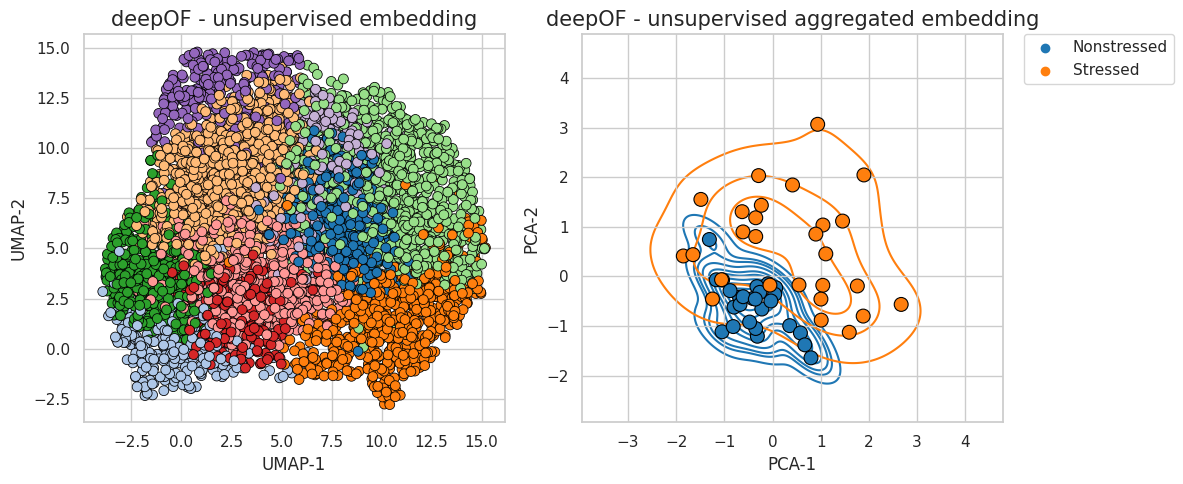

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

deepof.visuals.plot_embeddings(
    my_deepof_project,
    embeddings,
    soft_counts,
    breaks,
    aggregate_experiments   = None,
    samples                 = 100,
    colour_by               = "cluster",
    ax                      = ax1,
    save                    = False,  # Set to True, or give a custom name, to save the plot
)

deepof.visuals.plot_embeddings(
    my_deepof_project,
    embeddings,
    soft_counts,
    breaks,
    aggregate_experiments   = "time on cluster",  # Can also be set to 'mean' and 'median'
    exp_condition           = "CSDS",
    show_aggregated_density = True,
    ax                      = ax2,
    save                    = False,  # Set to True, or give a custom name, to save the plot,
) 
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

#plt.tight_layout()
plt.show()

#### As we can see, the clusters the model found are better in separating the groups than our pre-defined behaviors

#### Analogously to before, let's see which behaviors (the clusters) play a role in separating stressed and nonstressed mice 

In [ ]:
deepof.visuals.plot_enrichment(
    my_deepof_project,
    embeddings,
    soft_counts,
    breaks,
    normalize     = True,
    add_stats     = "Mann-Whitney",
    exp_condition = "CSDS",
    verbose       = False,
)

#plt.tight_layout()
plt.show()

#### It seems like Cluster 0 and 6 play a major role here. But what do these clusters represent? 

#### To figure this out we need a bit of patience. First, we have to repackage our data

In [26]:
csds_chunk_stats, hard_counts, sampled_breaks = deepof.post_hoc.annotate_time_chunks(
    deepof_project         = my_deepof_project,
    soft_counts            = soft_counts,
    breaks                 = breaks,
    supervised_annotations = supervised_annotation,
    animal_id              = "B",
    kin_derivative         = 1,
    window_size            = 25,
    include_distances      = True,
    min_confidence         = 0.9,
    include_angles         = False,
    include_areas          = True,
    aggregate              = "mean",
    samples                = 10000,
)

#### Then, we train a model using our supervisd behaviors to predict our clusters

In [27]:
(
    full_cluster_clf,
    cluster_gbm_performance,
    groups,
) = deepof.post_hoc.train_supervised_cluster_detectors(
    csds_chunk_stats,
    hard_counts,
    sampled_breaks,
    n_folds           = 5,
    verbose           = 2,
)

Training cross-validated models for performance estimation...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
TBB Warning: The number of workers is currently limited to 11. The request for 23 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

TBB Warning: The number of workers is currently limited to 11. The request for 23 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

TBB Warning: The number of workers is currently limited to 11. The request for 23 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

TBB Warning: The number of workers is currently limited to 11. The request for 23 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

TBB Warning: The number of workers is currently limited to 11. The request for 23 workers is ignored. Further requests for more workers will be silently ignored until the limi

Training on full dataset for feature importance estimation...


TBB Warning: The number of workers is currently limited to 11. The request for 23 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.



Done!


#### Now we can see how well our different clusters can be described using our supervised behaviors

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(18, 8))

deepof.visuals.plot_cluster_detection_performance(
    my_deepof_project,
    csds_chunk_stats,
    cluster_gbm_performance,
    hard_counts,
    groups,
    visualization = "confusion_matrix",
    ax            = ax,
)

deepof.visuals.plot_cluster_detection_performance(
    my_deepof_project,
    csds_chunk_stats,
    cluster_gbm_performance,
    hard_counts,
    groups,
    visualization = "balanced_accuracy",
    save          = False,
    ax            = ax2,
)

# plt.tight_layout()
plt.show()

#### Next we can extract which behaviors were how important to predict which cluster. To avoid further delays, we load an existing dataset

In [29]:
with open(
    "./tutorial_files/tutorial_project/Shap_analysis_results/SHAP_analysis_results_SI_sa.pkl",
    "rb",
) as handle:
    shap_values, explainer, data_to_explain = pickle.load(handle)[:3]

### Now we see which behaviors contributed to which clusters

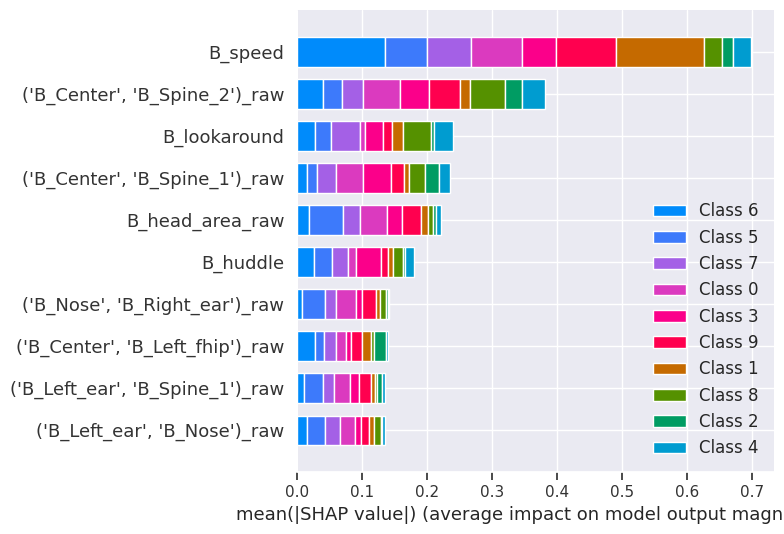

In [30]:
sns.set_theme()

deepof.visuals.plot_shap_swarm_per_cluster(
    my_deepof_project,
    data_to_explain,
    shap_values,
    "all",
    show = True,
)

### And further, for specific clusters, if high or low behavior / feature values impacted the model more 

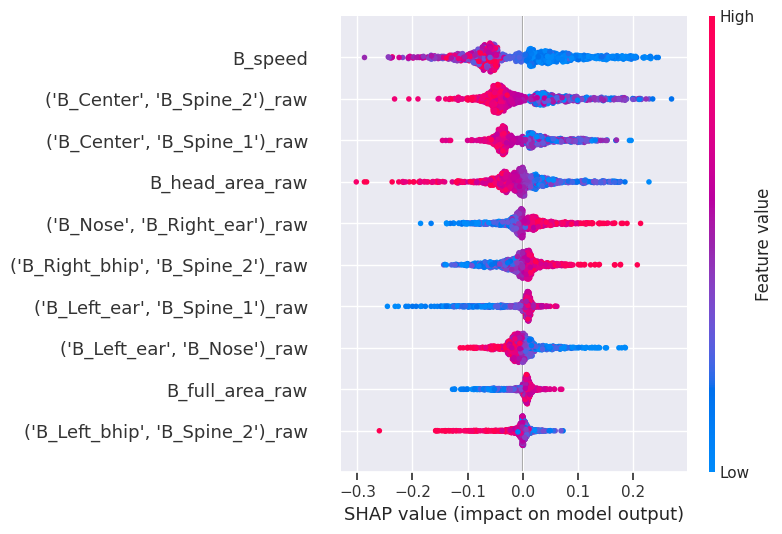

In [31]:
deepof.visuals.plot_shap_swarm_per_cluster(
    my_deepof_project,
    data_to_explain,
    shap_values,
    cluster = 0,
    show    = True,
)

#### For instance we see that Cluster 0 is highly impacted by low speeds of the black mouse (or "the blue mouse" in the video below)

#### Of course, we can also visualize clusters directly 

In [ ]:
video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    embedding           = embeddings,
    cluster_assignments = soft_counts,
    experiment_id       = "20191204_Day2_SI_JB08_Test_54",
    frame_limit         = 150,
    selected_cluster    = 0,
    dpi                 = 40,
    center              = "arena",
)

html = display.HTML(video)
display.display(html)
plt.close()